<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Posadzy/Binarno%C5%9B%C4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Całkowita liczba przypadków: 569
Liczba przypadków złośliwego raka: 357


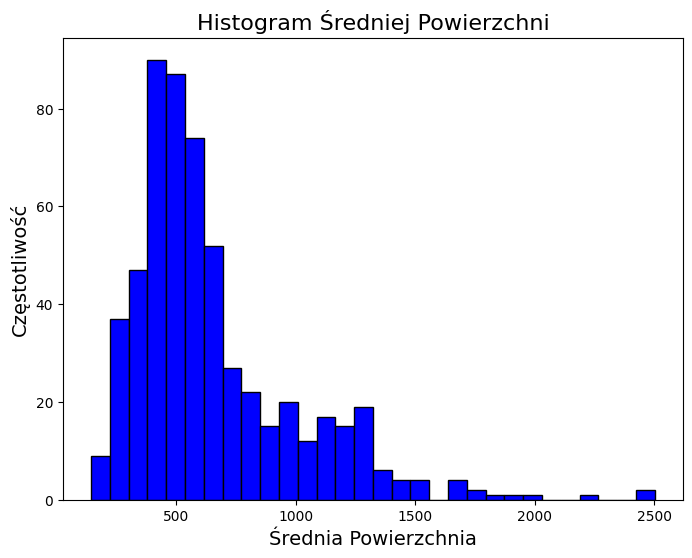

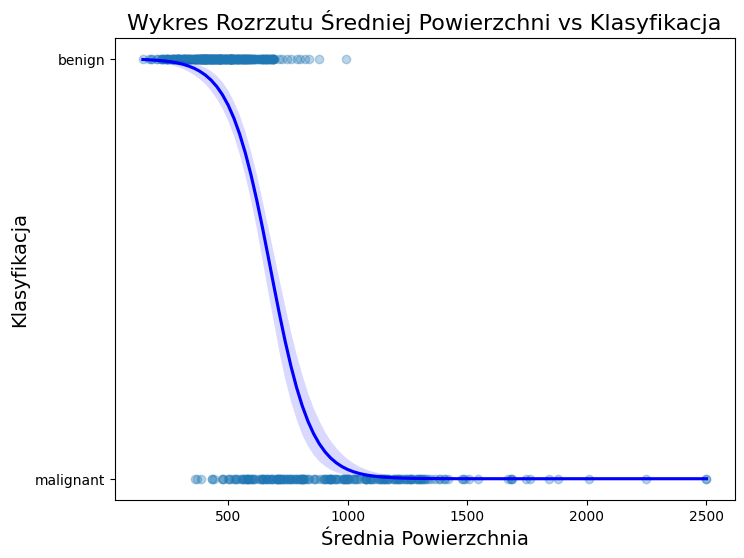

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_breast_cancer()
y = dataset.target
X = dataset.data

total_cases = len(y)
print("Całkowita liczba przypadków:", total_cases)

num_malignant = np.sum(y)
print("Liczba przypadków złośliwego raka:", num_malignant)

mean_area = X[:, np.where(dataset.feature_names == 'mean area')[0][0]]
plt.figure(figsize=(8, 6))
plt.hist(mean_area, bins=30, color='blue', edgecolor='black')
plt.xlabel('Średnia Powierzchnia', fontsize=14)
plt.ylabel('Częstotliwość', fontsize=14)
plt.title('Histogram Średniej Powierzchni', fontsize=16)
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.xlabel('Średnia Powierzchnia', fontsize=14)
plt.ylabel('Klasyfikacja', fontsize=14)
plt.title('Wykres Rozrzutu Średniej Powierzchni vs Klasyfikacja', fontsize=16)
plt.yticks([0, 1], dataset.target_names)
plt.show()

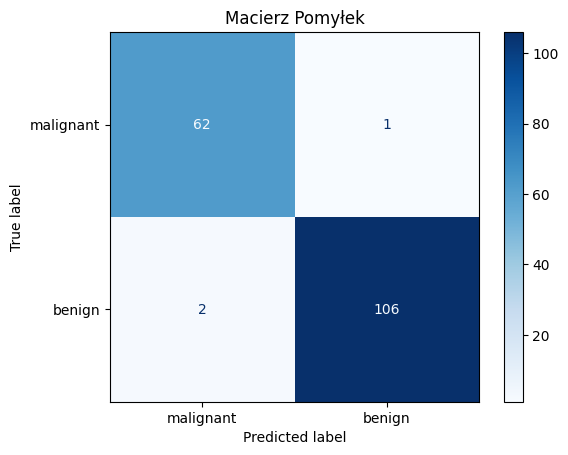

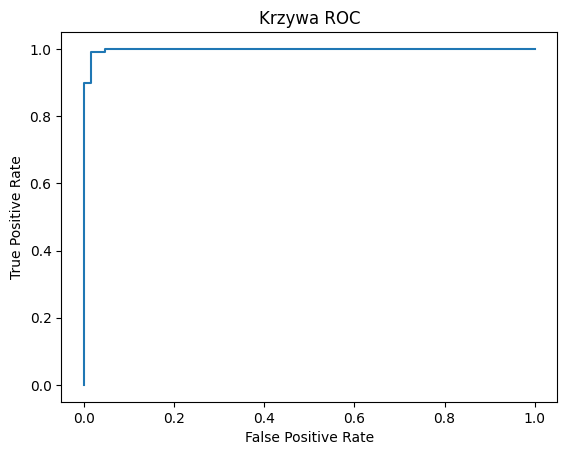

In [6]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
display.plot(cmap=plt.cm.Blues)
plt.title('Macierz Pomyłek')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('Krzywa ROC')
plt.show()
